In [1]:
from dask.distributed import Client

In [2]:
client = Client(threads_per_worker=1)

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 12
Total threads: 12,Total memory: 46.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44121,Workers: 12
Dashboard: /proxy/8787/status,Total threads: 12
Started: Just now,Total memory: 46.00 GiB
Comm: tcp://127.0.0.1:35965,Total threads: 1
Dashboard: /proxy/37781/status,Memory: 3.83 GiB
Nanny: tcp://127.0.0.1:39067,


In [4]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
cd /g/data/tm70/as2285/om3-scripts/expts_manager/r_25march/dev-025_cgrid_25mar/work

/scratch/tm70/as2285/access-om3/work/dev-025_cgrid_25mar-ctrl-4344a05a


In [6]:
ls

access-om3.cice_inst.1901-03-26-01350.nc
access-om3.cice_inst.1901-03-26-02700.nc
access-om3.cice_inst.1901-03-26-04050.nc
access-om3.cice_inst.1901-03-26-05400.nc
access-om3.cice_inst.1901-03-26-06750.nc
access-om3.cice_inst.1901-03-26-08100.nc
access-om3.cice_inst.1901-03-26-09450.nc
access-om3.cice_inst.1901-03-26-10800.nc
access-om3.cice_inst.1901-03-26-12150.nc
access-om3.cice_inst.1901-03-26-13500.nc
access-om3.cice_inst.1901-03-26-14850.nc
access-om3.cice_inst.1901-03-26-16200.nc
access-om3.cice_inst.1901-03-26-17550.nc
access-om3.cice_inst.1901-03-26-18900.nc
access-om3.cice_inst.1901-03-26-20250.nc
access-om3.cice_inst.1901-03-26-21600.nc
access-om3.cice_inst.1901-03-26-22950.nc
access-om3.cice_inst.1901-03-26-24300.nc
access-om3.cice_inst.1901-03-26-25650.nc
access-om3.cice_inst.1901-03-26-27000.nc
access-om3.cice_inst.1901-03-26-28350.nc
access-om3.cice_inst.1901-03-26-29700.nc
access-om3.cice_inst.1901-03-26-31050.nc
access-om3.cice_inst.1901-03-26-32400.nc
access-om3.cice_

In [7]:
grid_ds = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc')

In [8]:
grid_ds

<xarray.Dataset> Size: 93MB
Dimensions:     (xt_ocean: 1440, yt_ocean: 1080, time: 1, xu_ocean: 1440,
                 yu_ocean: 1080)
Coordinates:
  * xt_ocean    (xt_ocean) float64 12kB -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean    (yt_ocean) float64 9kB -81.08 -80.97 -80.87 ... 89.84 89.95
  * time        (time) object 8B 0002-01-01 00:00:00
  * xu_ocean    (xu_ocean) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yu_ocean    (yu_ocean) float64 9kB -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
    geolon_t    (yt_ocean, xt_ocean) float32 6MB ...
    geolat_t    (yt_ocean, xt_ocean) float32 6MB ...
    geolon_c    (yu_ocean, xu_ocean) float32 6MB ...
    geolat_c    (yu_ocean, xu_ocean) float32 6MB ...
Data variables:
    ht          (yt_ocean, xt_ocean) float32 6MB ...
    hu          (yu_ocean, xu_ocean) float32 6MB ...
    dxt         (yt_ocean, xt_ocean) float32 6MB ...
    dyt         (yt_ocean, xt_ocean) float32 6MB ...
    dxu         (yu_ocean, xu_ocean) float32 6MB ...
    dyu         (yu_ocean, xu_ocean) float32 6MB ...
    area_t      (yt_ocean, xt_ocean) float32 6MB ...
    area_u      (yu_ocean, xu_ocean) float32 6MB ...
    kmt         (yt_ocean, xt_ocean) float32 6MB ...
    kmu         (yu_ocean, xu_ocean) float32 6MB ...
    drag_coeff  (time, yu_ocean, xu_ocean) float32 6MB ...
Attributes:
    filename:   ocean_grid.nc
    title:      MOM5
    grid_type:  mosaic
    grid_tile:  1

In [9]:
grid_ds=grid_ds.rename({'xt_ocean':'ni', 'yt_ocean':'nj'})

In [10]:
gcrash_point = grid_ds.isel(ni=1068,nj=1001)

In [11]:
gcrash_point.dxt.values

array(6795.349, dtype=float32)

In [12]:
gcrash_point.dyt.values

array(11733.496, dtype=float32)

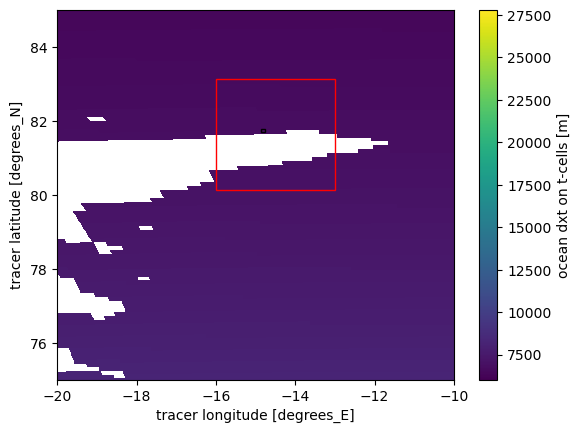

In [13]:
plt.figure()
ax = plt.subplot()

grid_ds.dxt.plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
plt.ylim([75,85])
plt.xlim([-20,-10])

ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='red', fill=None))
ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))

plt.show()

# And with the inst output

In [14]:
inst_files = ! ls access-om3.cice_inst.1901-03-*.nc

In [15]:
inst_files

['access-om3.cice_inst.1901-03-26-01350.nc',
 'access-om3.cice_inst.1901-03-26-02700.nc',
 'access-om3.cice_inst.1901-03-26-04050.nc',
 'access-om3.cice_inst.1901-03-26-05400.nc',
 'access-om3.cice_inst.1901-03-26-06750.nc',
 'access-om3.cice_inst.1901-03-26-08100.nc',
 'access-om3.cice_inst.1901-03-26-09450.nc',
 'access-om3.cice_inst.1901-03-26-10800.nc',
 'access-om3.cice_inst.1901-03-26-12150.nc',
 'access-om3.cice_inst.1901-03-26-13500.nc',
 'access-om3.cice_inst.1901-03-26-14850.nc',
 'access-om3.cice_inst.1901-03-26-16200.nc',
 'access-om3.cice_inst.1901-03-26-17550.nc',
 'access-om3.cice_inst.1901-03-26-18900.nc',
 'access-om3.cice_inst.1901-03-26-20250.nc',
 'access-om3.cice_inst.1901-03-26-21600.nc',
 'access-om3.cice_inst.1901-03-26-22950.nc',
 'access-om3.cice_inst.1901-03-26-24300.nc',
 'access-om3.cice_inst.1901-03-26-25650.nc',
 'access-om3.cice_inst.1901-03-26-27000.nc',
 'access-om3.cice_inst.1901-03-26-28350.nc',
 'access-om3.cice_inst.1901-03-26-29700.nc',
 'access-o

In [16]:
inst_ds = xr.open_mfdataset(inst_files)

In [17]:
inst_ds['TLON']=grid_ds['geolon_t']

In [18]:
inst_ds['TLAT']=grid_ds['geolat_t']

In [19]:
crash_point = inst_ds.isel(ni=1068,nj=1001)

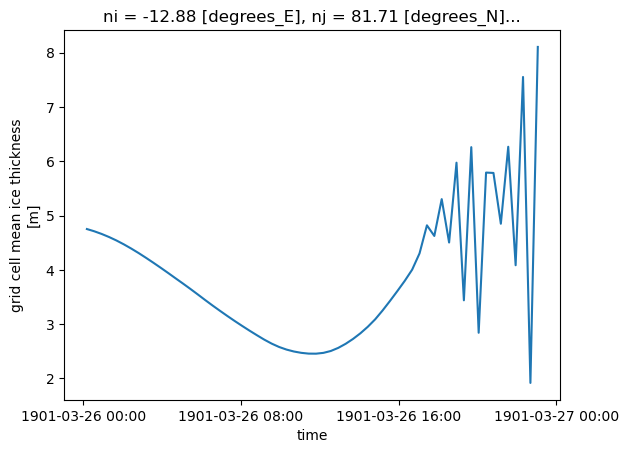

In [20]:
crash_point.hi_1.plot()

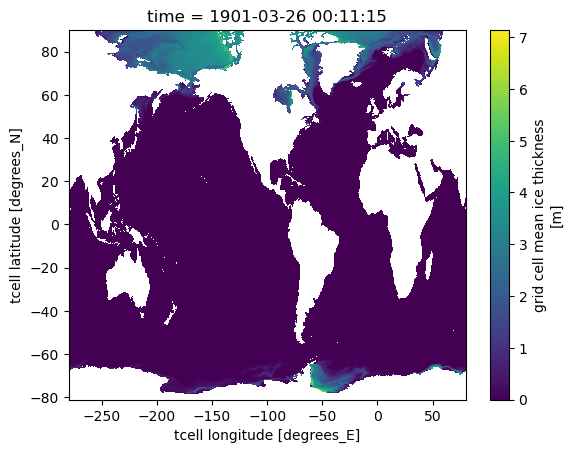

In [21]:
inst_ds.isel(time=0).hi_1.plot()

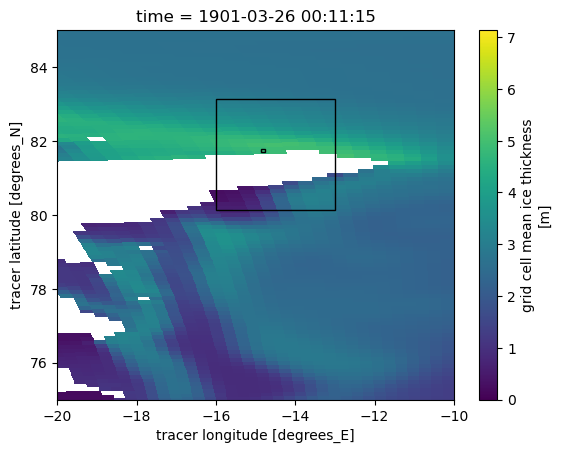

In [22]:
plt.figure()
ax = plt.subplot()

inst_ds.hi_1.isel(time=0).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
plt.ylim([75,85])
plt.xlim([-20,-10])

ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))


In [26]:
inst_ds

<xarray.Dataset> Size: 39GB
Dimensions:      (time: 62, nbnd: 2, nkice: 4, nksnow: 1, nkbio: 3, nkaer: 5,
                  nj: 1080, ni: 1440, nc: 5)
Coordinates:
  * time         (time) object 496B 1901-03-26 00:11:15 ... 1901-03-26 23:03:45
    NCAT         (nc) float64 40B dask.array<chunksize=(5,), meta=np.ndarray>
  * ni           (ni) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * nj           (nj) float64 9kB -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    geolon_t     (nj, ni) float32 6MB ...
    geolat_t     (nj, ni) float32 6MB ...
Dimensions without coordinates: nbnd, nkice, nksnow, nkbio, nkaer, nc
Data variables: (12/50)
    time_bounds  (time, nbnd) object 992B dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi        (time, nkice) float64 2kB dask.array<chunksize=(1, 4), meta=np.ndarray>
    VGRDs        (time, nksnow) float64 496B dask.array<chunksize=(1, 1), meta=np.ndarray>
    VGRDb        (time, nkbio) float64 1kB dask.array<chunksize=(1, 3), meta=np.ndarray>
    VGRDa        (time, nkaer) float64 2kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    blkmask      (time, nj, ni) float64 771MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    ...           ...
    dvidtd_1     (time, nj, ni) float64 771MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    dvirdgdt_1   (time, nj, ni) float64 771MB dask.array<chunksize=(1, 540, 720), meta=np.ndarray>
    aicen_1      (time, nc, nj, ni) float64 4GB dask.array<chunksize=(1, 2, 540, 720), meta=np.ndarray>
    dvirdgndt_1  (time, nc, nj, ni) float64 4GB dask.array<chunksize=(1, 2, 540, 720), meta=np.ndarray>
    TLON         (nj, ni) float32 6MB ...
    TLAT         (nj, ni) float32 6MB ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19010326
    comment3:            seconds elapsed into model date:   1350
    time_period_freq:    step_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-11-27 at 11:27
    io_flavor:           io_pio2 hdf5

(-20.0, -10.0)

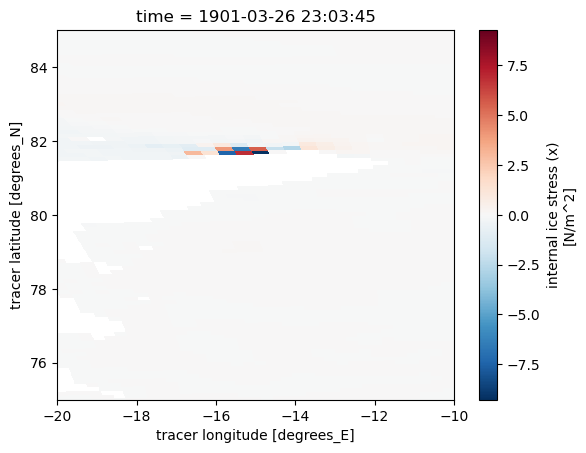

In [28]:
plt.figure()
ax = plt.subplot()

inst_ds.strintxE_1.isel(time=-1).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
plt.ylim([75,85])
plt.xlim([-20,-10])

# ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
# ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))


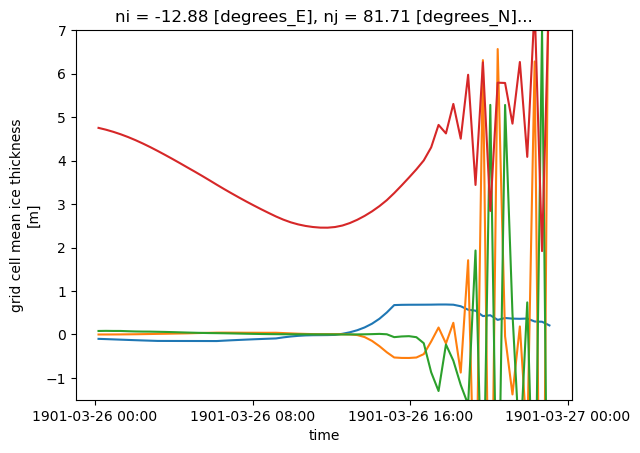

In [23]:
crash_point.strairxE_1.plot()
crash_point.strocnxE_1.plot()
plt.ylim([-1.5,7])
# plt.xlim([24,None])
crash_point.strintxE_1.plot()
crash_point.hi_1.plot()
# crash_point.uvelE_1.plot()
# ax2 = plt.gca().twinx()
# crash_point.dvirdgdt_1.plot()
# plt.ylim([-300,300])
# crash_point.strcorxE_1.plot()


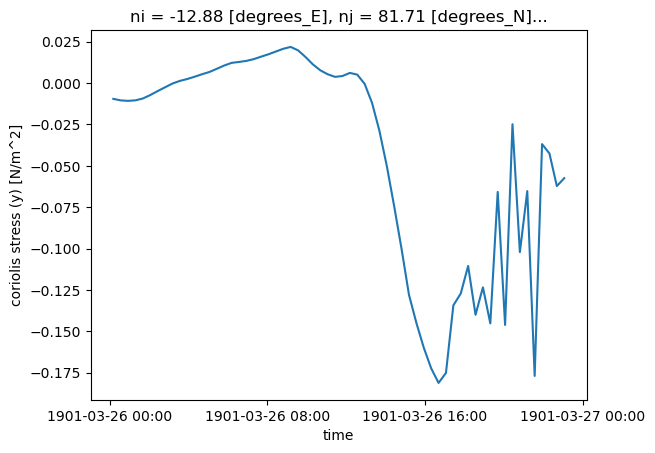

In [24]:
crash_point.strcoryN_1.plot()

In [25]:
crash1_point.strairxE_1.plot()
crash1_point.strocnxE_1.plot()
plt.ylim([-1.2,1.2])
crash1_point.strintxE_1.plot()
# crash_point.uvelE_1.plot()
# ax2 = plt.gca().twinx()
# crash_point.dvirdgdt_1.plot()
# plt.ylim([-300,300])


NameError: name 'crash1_point' is not defined

In [ ]:
crash_point.strairyN_1.plot(label='strairyN')
crash_point.strocnyN_1.plot(label='strocnyN')
plt.ylim([-1.2,1.2])
crash_point.strintyN_1.plot(label='strintyN')
plt.legend()

In [ ]:
crash1_point.strairy_1.plot()
crash1_point.strocnyN_1.plot()
plt.ylim([-1.2,1.2])
crash1_point.strintyN_1.plot()

In [ ]:
crash_point.strairxE_1.plot()

In [ ]:
plt.subplot(2,1,1)
crash_point.dvirdgdt_1.plot()
plt.subplot(2,1,2)
crash_point.uvelE_1.plot()

In [ ]:
for i in range(0,5):
    crash_point.dvirdgndt_1.isel(nc=i).plot(label=i)

In [ ]:
crash1_point = inst_ds.isel(ni=1069,nj=1001)

In [ ]:
crash1_point.dvirdgdt_1.plot()

In [ ]:
crash_point.aice_1.plot()

In [ ]:
crash_point.isel(time=slice(-100,None)).aice_1.plot()

In [ ]:
crash_point.isel(time=slice(-100,None)).hs_1.plot()

In [ ]:
for v in ['uvel_1',#'vvel_1', 
          'uvelE_1', #'vvelE_1', 
          'uvelN_1', #'vvelN_1'
         ]:
    crash_point[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

In [ ]:
for v in ['vvel_1', 
          'vvelE_1', 
          'vvelN_1'
         ]:
    crash_point[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

In [ ]:
plt.figure()
ax = plt.subplot()

inst_ds.aice_1.isel(time=-1).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
# plt.ylim([75,85])
# plt.xlim([-20,-10])

ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='red', fill=None))
ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))

plt.show()

In [ ]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.aice_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


In [ ]:
for t in range(-30,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.uvelE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


In [ ]:
for t in range(-35,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.vvelN_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


In [ ]:
for t in range(-35,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.dvirdgdt_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


In [ ]:
inst_ds

In [ ]:
cpl_files = ! ls access-om3.cpl.hi.ice*

In [ ]:
cpl_files

In [ ]:
cpl_ds = xr.open_mfdataset(cpl_files)

In [ ]:
cpl_ds

In [ ]:
crash_point = cpl_ds.isel(iceExp_nx=1068,iceExp_ny=1001, iceImp_nx=1068,iceImp_ny=1001)

In [ ]:
crash_point

In [ ]:
crash_point.iceExp_Sa_u.plot()
crash_point.iceExp_Sa_v.plot()


In [ ]:
crash_point.iceExp_So_u.plot()
crash_point.iceExp_So_v.plot()

In [ ]:
crash_point.iceImp_Fioi_taux.plot()

In [ ]:
crash_point.iceImp_Faii_taux.plot()
crash_point.iceImp_Faii_tauy.plot()

In [ ]:
ocn_cpl_files = ! ls access-om3.cpl.hi.ocn*

In [ ]:
ocn_cpl_ds = xr.open_mfdataset(ocn_cpl_files)

In [ ]:
ocn_crash_point = ocn_cpl_ds.isel(ocnExp_nx=1068,ocnExp_ny=1001, ocnImp_nx=1068,ocnImp_ny=1001)

In [ ]:
ocn_crash_point

In [ ]:
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
crash_point.iceExp_Sa_u.plot()
plt.subplot(4,1,2)
# crash_point.iceImp_Faii_taux.plot()
crash_point.iceImp_Fioi_taux.plot(label='ice-ocn taux')
# plt.subplot(4,1,3)
ocn_crash_point.ocnExp_Foxx_taux.plot(label='ocn-med taux')
plt.legend()
plt.subplot(4,1,3)
ocn_crash_point.ocnImp_So_u.plot(label='ocn u')
plt.legend()
# plt.subplot(5,1,5)
# ocn_crash_point.ocn

In [ ]:
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
crash_point.iceExp_Sa_u.plot()
plt.subplot(4,1,2)
# crash_point.iceImp_Faii_taux.plot()
crash_point.iceImp_Fioi_tauy.plot(label='ice-ocn tauy')
# plt.subplot(4,1,3)
ocn_crash_point.ocnExp_Foxx_tauy.plot(label='ocn-med tauy')
plt.legend()
plt.subplot(4,1,3)
ocn_crash_point.ocnImp_So_v.plot(label='ocn v')
plt.legend()
# plt.subplot(5,1,5)
# ocn_crash_point.ocn